# Task 01

## Categorical-variables.Visualization-techniques-exercise-Solution
Ice cream shop

### Task1.1
1. **Background:** There is an ice cream shop, that is operating in New York, LA and San Francisco.
2. **Data:**       You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.
3. **Task:**       Order the data in a frequency distribution table.   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
frequency = {'Frequency':[12327,17129,19923]}
total_val = frequency.copy()
total_val['Frequency'].append(sum(total_val['Frequency']))
Freq_Distrib_Categorical_variables = pd.DataFrame(total_val, index=['New York', 'LA', 'San Francisco','Total'])
del frequency['Frequency'][3]
Freq_Distrib_Categorical_variables


Frequency
New York           12327
LA                 17129
San Francisco      19923
Total              49379

### Task1.2

1. Background: You have a frequency distribution table with all the sales.
2. Task: Create a bar chart, representing the data. Note that in Excel, the term for a bar charts are called both:  'column charts' and 'bar charts'.

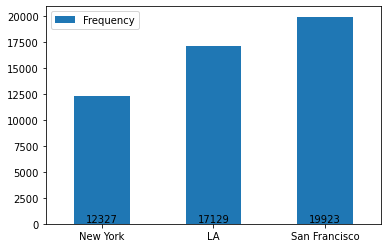

In [4]:

Categorical_variables_bar_chart = pd.DataFrame(frequency,index=['New York', 'LA', 'San Francisco'])
Categorical_variables_bar_chart
ax = Categorical_variables_bar_chart.plot.bar(rot=0)
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., 0),ha='center',va='center',xytext=(0, 5), textcoords='offset points')

In [5]:
Categorical_variables_bar_chart

Frequency
New York           12327
LA                 17129
San Francisco      19923

#### Horizontal Bar Chart

(0.0, 22300.0)

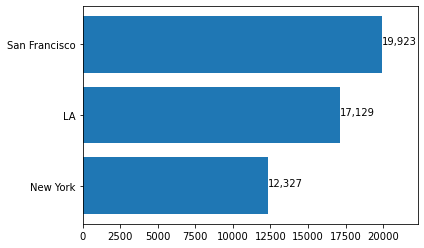

In [6]:
ax1 = plt.subplot(1,1,1)
ax1.barh(Categorical_variables_bar_chart.index, Categorical_variables_bar_chart['Frequency'])
for Y,X in enumerate(Categorical_variables_bar_chart['Frequency']):
    ax1.annotate("{:,}".format(X),xy=(X,Y))
ax1.set_xlim(0,22300)

### Task 1.3
1. Background: You have a frequency distribution table with all the sales.
2. Task 1: Create a new column in your table, representing the relative frequency of input. You can choose to express it in percentages or as a decimal.
3. Task 2: Create a pie chart, representing the share of each city to the sales of your company.

In [7]:

Freq_Distrib_Categorical_variables['Relative frequency'] = (round((Freq_Distrib_Categorical_variables['Frequency']/Freq_Distrib_Categorical_variables['Frequency'][3])*100).astype(int)).astype(str) + "%"
Freq_Distrib_Categorical_variables


Frequency Relative frequency
New York           12327                25%
LA                 17129                35%
San Francisco      19923                40%
Total              49379               100%

#### Ploting pi Chart

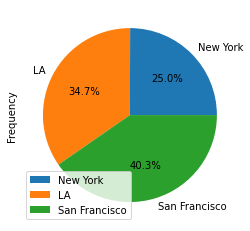

In [8]:
Categorical_variables_bar_chart.plot(kind='pie',y='Frequency',autopct='%1.1f%%')

#### Plotting with pareto diagram

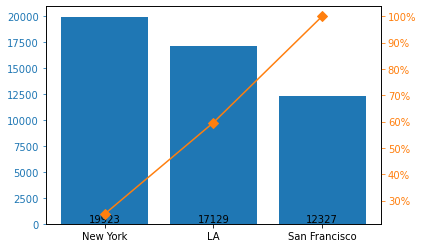

In [10]:
from matplotlib.ticker import PercentFormatter
df_sorted = Categorical_variables_bar_chart.sort_values(by='Frequency',ascending=False)
Categorical_variables_bar_chart["cumpercentage"] = Categorical_variables_bar_chart["Frequency"].cumsum()/Categorical_variables_bar_chart["Frequency"].sum()*100
fig, ax = plt.subplots()
ax.bar(df_sorted.index, df_sorted["Frequency"], color="C0")
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., 0),ha='center',va='center',xytext=(0, 5), textcoords='offset points')
ax2 = ax.twinx()
ax2.plot(Categorical_variables_bar_chart.index, Categorical_variables_bar_chart["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Task 02

## Cross-table-and-scatter-plot-exercise-solution

Cross table

### Task 2.1

1. Background: You have employment data about country X. You have been asked to prepare a cross-table showing that data. 
                60% of 18 to 25-year-olds are employed
                85% of 25 to 35-year-olds are employed
                5% of 35 to 45-year-olds are unemployed
                3% of 45 to 55-year-olds are unemployed
                3% of 55 to 65-year-olds are unemployed
                All 65+ are employed. Note: the definition of unemployed is: without a job, but actively searching for one.  
                That's probably why all 65+s are employed.
2. Task 1:      Create a cross table summarizing the data you have been given.
3. Task 2:      Create a side-by-side bar chart (it is called clustered column chart in Excel), in order to visually enhance your summary.

In [11]:
    cross_table_data = {'Employed':[60,85,95,97,97,100],'Unemployed':[40,15,5,3,3,0],'Total':[100,100,100,100,100,100]}
cross_table_data['Employed'].append(sum(cross_table_data['Employed']))
cross_table_data['Unemployed'].append(sum(cross_table_data['Unemployed']))
cross_table_data['Total'].append(sum(cross_table_data['Total']))
cross_table = pd.DataFrame(cross_table_data, index=['18-25', '25-35', '35-45','45-55','55-65','65+','Total'])
cross_table

Employed  Unemployed  Total
18-25        60          40    100
25-35        85          15    100
35-45        95           5    100
45-55        97           3    100
55-65        97           3    100
65+         100           0    100
Total       534          66    600

#### PLoting Data

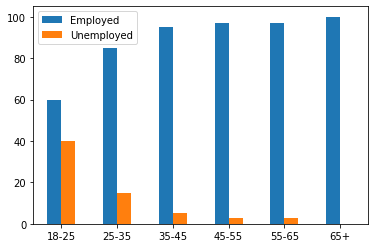

In [12]:

Employed_data = [60,85,95,97,97,100]
Unemployed_data = [40,15,5,3,3,0]
indexx = ['18-25', '25-35', '35-45','45-55','55-65','65+']
cross_table_bar_plot = pd.DataFrame({'Employed':Employed_data,'Unemployed':Unemployed_data}, index=indexx)
cross_table_bar_plot.plot.bar(rot=0)

### Task 2.2

1. Background	You are given the closing stock prices of Apple, Alphabet Inc. (Google) and Bank of America on different dates for a period of 6 months.									
2. Task 2.2.1	Create a scatter plot with Apple and Alphabet stock prices. 									
3. Task 2.2.2	Create a scatter plot with Apple and Bank of America stock prices									
4. Task 2.2.3	Explore if there is a relationship between the two variables.

In [84]:
data = pd.read_excel('Cross-tabel-data.xlsx')
data

Date  Apple (AAPL)  Alphabet (GOOGL)  Bank of America (BAC)
0   2017-01-03        116.15            808.01                  22.53
1   2017-01-04        116.02            807.77                  22.95
2   2017-01-05        116.61            813.02                  22.68
3   2017-01-06        117.91            825.21                  22.68
4   2017-01-09        118.99            827.18                  22.55
..         ...           ...               ...                    ...
99  2017-05-25        153.87            991.86                  23.25
100 2017-05-26        153.61            993.27                  23.24
101 2017-05-30        153.67            996.17                  22.91
102 2017-05-31        152.76            987.09                  22.41
103 2017-06-01        153.18            988.29                  22.63

[104 rows x 4 columns]

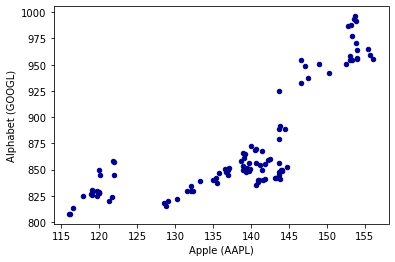

In [86]:
Apple_Google = data.plot.scatter(x='Apple (AAPL)',
                      y='Alphabet (GOOGL)',
                      c='DarkBlue')
Apple_Google

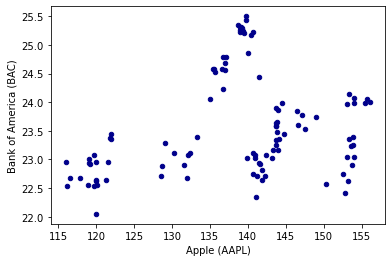

In [87]:
Apple_bank_america = data.plot.scatter(x='Apple (AAPL)',
                      y='Bank of America (BAC)',
                      c='DarkBlue')

# Task 03

## Numerical-variables.Frequency-distribution-table-lesson.xlsx
1. Background	You are given a dataset.									
2. Task 3.1	Given that we want to divide the numbers into 6 intervals of equal width, calculate that interval width. Round up to the nearest whole number, bigger than the result that you obtain									
3. Task 3.2	Create a frequency distribution table that shows 									
		1. The intervals 								
		2. The absolute frequency of each interval								
		3. The relative frequency of each interval								
4. Task 3.3	Repeat task 1 and 2, but this time, use the exact interval width. Don't round up to the nearest whole number, that is.									


In [80]:
Numerical_list = [1,9,22,24,32,33,41,44,57,66,70,73,75,76,79,82,87,89,95,100]
freq = np.ones(20)
nume_data = pd.DataFrame({'Dataset':Numerical_list, 'Frequency':freq})
nume_data

Dataset  Frequency
0         1        1.0
1         9        1.0
2        22        1.0
3        24        1.0
4        32        1.0
5        33        1.0
6        41        1.0
7        44        1.0
8        57        1.0
9        66        1.0
10       70        1.0
11       73        1.0
12       75        1.0
13       76        1.0
14       79        1.0
15       82        1.0
16       87        1.0
17       89        1.0
18       95        1.0
19      100        1.0

### Task 3.1 and 3.2

In [78]:
#Frequency distribution table with excat rounded width
bins2 = [8,54,100,146,192,238]
catog2 = pd.cut(Numerical_list,bins2)
interval_frequency2 = pd.value_counts(catog2, sort=False)
relative_frequency2 = interval_frequency2/sum(interval_frequency2) 
numDataInterver2 = pd.DataFrame({'Frequency': interval_frequency2, 'relative_frequency':relative_frequency2})
numDataInterver2

Frequency  relative_frequency
(8, 54]             7            0.368421
(54, 100]          12            0.631579
(100, 146]          0            0.000000
(146, 192]          0            0.000000
(192, 238]          0            0.000000

### Task 3.3

In [79]:
#Frequency distribution table with excat width
bins = [7.00,53.67,99.33,145.00,190.67,236.33]
catog = pd.cut(Numerical_list,bins)
interval_frequency = pd.value_counts(catog, sort=False)
relative_frequency = interval_frequency/sum(interval_frequency) 
numDataInterver = pd.DataFrame({'Frequency': interval_frequency, 'relative_frequency':relative_frequency})
numDataInterver

Frequency  relative_frequency
(7.0, 53.67]              7            0.368421
(53.67, 99.33]           11            0.578947
(99.33, 145.0]            1            0.052632
(145.0, 190.67]           0            0.000000
(190.67, 236.33]          0            0.000000

# Task 04

## The histogram

1. Background: you are given a dataset.
2. Task4.1. Construct a frequency distribution table. Note: Go to the next sheet if you wish to skip this part.
3. Task4.2. Create a histogram with 10 intervals, based on your dataset.

### Task 4.1

In [62]:
#Frequency distribution table. Exact width
Dataset = [13,68,165,193,216,228,361,470,500,529,544,602,647,692,696,699,809,892,899,936]
bins = [12,105.3,197.6,289.9,382.2,474.5,566.8,659.1,751.4,843.7,936]
catagori_float_width = pd.cut(Dataset,bins)
intervel_freq_value = pd.value_counts(catagori_float_width, sort=False)
relative_frequency_val = intervel_freq_value/sum(intervel_freq_value)
frame = pd.DataFrame(intervel_freq_value)
frame_with_relFreq = pd.DataFrame({'Frequency':intervel_freq_value,'Relative Frequency': relative_frequency_val})
frame_with_relFreq

Frequency  Relative Frequency
(12.0, 105.3]           2                0.10
(105.3, 197.6]          2                0.10
(197.6, 289.9]          2                0.10
(289.9, 382.2]          1                0.05
(382.2, 474.5]          1                0.05
(474.5, 566.8]          3                0.15
(566.8, 659.1]          2                0.10
(659.1, 751.4]          3                0.15
(751.4, 843.7]          1                0.05
(843.7, 936.0]          3                0.15

In [61]:
#Frequency distribution table. Rounded up width
bins2 = [int(round(i)) for i in bins]
catagori_float_width2 = pd.cut(Dataset,bins2)
intervel_freq_value2 = pd.value_counts(catagori_float_width2, sort=False)
relative_frequency_val2 = intervel_freq_value2/sum(intervel_freq_value2)
frame2 = pd.DataFrame(intervel_freq_value2)
frame_with_relFreq2 = pd.DataFrame({'Frequency':intervel_freq_value2,'Relative Frequency': relative_frequency_val2})
frame_with_relFreq2

Frequency  Relative Frequency
(12, 105]           2                0.10
(105, 198]          2                0.10
(198, 290]          2                0.10
(290, 382]          1                0.05
(382, 474]          1                0.05
(474, 567]          3                0.15
(567, 659]          2                0.10
(659, 751]          3                0.15
(751, 844]          1                0.05
(844, 936]          3                0.15

### Task 4.2

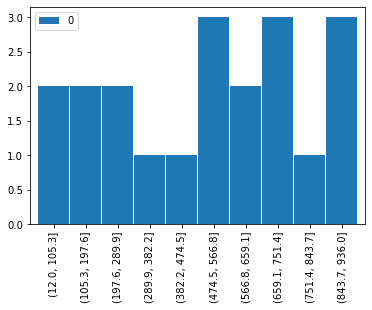

In [59]:
frame.plot.bar(width=0.95567)